# Analysis on Udemy Web Development Courses

In [1]:
import pandas as pd
web_dev = pd.read_csv("UdemyWebDevelopment.csv")
web_dev.head(5)

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime,Unnamed: 11,Unnamed: 12,Is Paid,Total,Percent
0,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4 hours,2013-01-03T00:55:31Z,NaN,NaN,Yes,1067.0,89%
1,19603,Learning Dynamic Website Design - PHP MySQL an...,https://www.udemy.com/learning-dynamic-website...,True,50,47886,285,125,All Levels,12.5 hours,2012-06-18T16:52:34Z,NaN,NaN,No,133.0,11%
2,889438,ChatBots: Messenger ChatBot with API.AI and No...,https://www.udemy.com/chatbots/,True,50,2577,529,64,All Levels,4.5 hours,2016-06-30T16:57:08Z,NaN,NaN,NaN,NaN,NaN
3,197836,Projects in HTML5,https://www.udemy.com/projects-in-html5/,True,60,8777,206,75,Intermediate Level,15.5 hours,2014-06-17T05:43:50Z,NaN,NaN,NaN,NaN,NaN
4,505208,Programming Foundations: HTML5 + CSS3 for Entr...,https://www.udemy.com/html-css-more/,True,20,23764,490,58,Beginner Level,5.5 hours,2015-10-17T04:52:25Z,NaN,NaN,NaN,NaN,NaN


# Why is dtype of "price" an object?

First, we have found a handful of columns we won't need and does not add anything to the dataset. After checking the columns for any missing values and for the correct dypes, we have found that the `price` and `contentInfo` columns are of the `object` dtype.

In [2]:
web_dev = web_dev.drop(["Unnamed: 11","Unnamed: 12","Is Paid","Total","Percent"], axis=1)
web_dev.info()
print(web_dev.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1200 non-null   int64 
 1   title                 1200 non-null   object
 2   url                   1200 non-null   object
 3   isPaid                1200 non-null   bool  
 4   price                 1200 non-null   object
 5   numSubscribers        1200 non-null   int64 
 6   numReviews            1200 non-null   int64 
 7   numPublishedLectures  1200 non-null   int64 
 8   instructionalLevel    1200 non-null   object
 9   contentInfo           1200 non-null   object
 10  publishedTime         1200 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 95.0+ KB
(1200, 11)


After checking what's happening with the `price` column, we can see that one of the values is `Free`. We want this column to have a dtype of `int` so that we can potentially perform calculations on this column by simply replacing `Free` with `0`.

In [3]:
web_dev.price.value_counts().head()

20      187
Free    133
50      121
200     113
195      72
Name: price, dtype: int64

In [4]:
web_dev.price.replace("Free", 0, inplace=True)
web_dev.price = web_dev.price.astype(int)
web_dev.price.value_counts().head(5)

20     187
0      133
50     121
200    113
195     72
Name: price, dtype: int64

In [5]:
web_dev.instructionalLevel.value_counts()

All Levels            659
Beginner Level        391
Intermediate Level    135
Expert Level           15
Name: instructionalLevel, dtype: int64

# Cleaning The `contentInfo` Column
We want this column to be dtype `float` and we can't perform any calculations if there is a substring attached for the unit. We'll change the column name to `contentInfo_hours` and then see what we are dealing with. The interesting thing is that there are some values expressed in minutes instead of hours. We need to first convert the values that are in minutes to be expressed in hours instead so that we don't get confused with `34 mins` for `34 hours` when we remove all of the unit substrings. However, the exact number of minutes a course has is redundant for the analysis, so we will express any course shorter than 1 hour as `0` hours

In [6]:
web_dev = web_dev.rename(columns = {web_dev.columns[9]: "contentInfo_hours"})

pd.set_option("display.max_rows", None)
web_dev["contentInfo_hours"].value_counts().head(25)

1 hour        136
1.5 hours     124
2 hours       123
3 hours        82
3.5 hours      74
2.5 hours      71
4 hours        56
5 hours        41
4.5 hours      38
5.5 hours      34
6.5 hours      30
6 hours        26
7 hours        25
7.5 hours      20
8 hours        18
9 hours        18
8.5 hours      13
13 hours       11
12.5 hours     11
11 hours       11
10 hours       10
10.5 hours     10
37 mins         9
12 hours        9
34 mins         9
Name: contentInfo_hours, dtype: int64

Every class that is under one hour will be denoted as 0 (hours), as a few minutes difference in the length of the classes under and hour will not be significant to the analysis

After renaming the column, we'll first remove any row values with " mins". Since we know that only the row values that are floats instead of string objects are minutes, we'll isolate those row values to convert them to minutes. And then we can clean the rest of the row values because we know that those are hour values.

In [7]:
web_dev["contentInfo_hours"] = web_dev["contentInfo_hours"].apply(lambda x: '0' if ' mins' in x else x)
web_dev["contentInfo_hours"] = web_dev["contentInfo_hours"].replace(to_replace =[' hour$',' hours$'], value = "", regex = True)
web_dev["contentInfo_hours"] = web_dev["contentInfo_hours"].astype(float)
web_dev["contentInfo_hours"].value_counts().head(25)

1.0     136
1.5     124
2.0     123
3.0      82
0.0      76
3.5      74
2.5      71
4.0      56
5.0      41
4.5      38
5.5      34
6.5      30
6.0      26
7.0      25
7.5      20
9.0      18
8.0      18
8.5      13
11.0     11
12.5     11
13.0     11
10.0     10
10.5     10
9.5       9
12.0      9
Name: contentInfo_hours, dtype: int64

In [8]:
# one final check for cleaning
web_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1200 non-null   int64  
 1   title                 1200 non-null   object 
 2   url                   1200 non-null   object 
 3   isPaid                1200 non-null   bool   
 4   price                 1200 non-null   int32  
 5   numSubscribers        1200 non-null   int64  
 6   numReviews            1200 non-null   int64  
 7   numPublishedLectures  1200 non-null   int64  
 8   instructionalLevel    1200 non-null   object 
 9   contentInfo_hours     1200 non-null   float64
 10  publishedTime         1200 non-null   object 
dtypes: bool(1), float64(1), int32(1), int64(4), object(4)
memory usage: 90.4+ KB


# Statistics and Visualization
Now that cleaning is completed, we will do some basic descriptive statistics to explore what kind of relationship the columns have with each other.

In [9]:
web_dev.describe().round(2)

,id,price,numSubscribers,numReviews,numPublishedLectures,contentInfo_hours
count,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00
mean,706854.25,77.03,6650.48,358.35,52.82,5.56
std,328924.40,66.08,14613.65,1574.81,62.81,7.28
min,8324.00,0.00,19.00,0.00,5.00,0.00
25%,475711.50,20.00,1127.50,25.00,19.00,1.50
50%,738456.00,50.00,2416.50,65.00,32.00,3.00
75%,975271.50,115.00,6894.75,179.25,63.25,6.50
max,1277924.00,200.00,268923.00,27445.00,779.00,76.50


Below, we observe the correlation coefficients between all of the columns and we have found no notable correlation between columns when comparing correlation coefficients. The `numPublishedLectures` and `contentInfo_hours` columns have a correlation coefficient of `0.86`, but that doesn't mean much to us because you're obviously going to have more hours in your course if you publish more lectures.

In [10]:
web_dev.corr(method='pearson').round(2)

,id,isPaid,price,numSubscribers,numReviews,numPublishedLectures,contentInfo_hours
id,1.00,0.04,0.13,-0.26,-0.09,-0.03,-0.05
isPaid,0.04,1.00,0.41,-0.27,-0.07,0.16,0.15
price,0.13,0.41,1.00,0.01,0.13,0.39,0.38
numSubscribers,-0.26,-0.27,0.01,1.00,0.64,0.13,0.15
numReviews,-0.09,-0.07,0.13,0.64,1.00,0.27,0.27
numPublishedLectures,-0.03,0.16,0.39,0.13,0.27,1.00,0.86
contentInfo_hours,-0.05,0.15,0.38,0.15,0.27,0.86,1.00


# Regression Analysis of `contentInfo_hours` and `price`
We would think that we can make assumptions that the amount of hours a course has would give us a rough indicator of how it would be priced.

In [13]:
import statsmodels.api as sm
regdata = web_dev[["price","contentInfo_hours"]]
regdata.describe().round(2)

,price,contentInfo_hours
count,1200.00,1200.00
mean,77.03,5.56
std,66.08,7.28
min,0.00,0.00
25%,20.00,1.50
50%,50.00,3.00
75%,115.00,6.50
max,200.00,76.50


In [14]:
# creating a linear regression which predicts price based on course length in hours
y = regdata["price"]
x1 = regdata["contentInfo_hours"]

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     200.3
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           3.62e-42
Time:                        15:33:29   Log-Likelihood:                -6638.5
No. Observations:                1200   AIC:                         1.328e+04
Df Residuals:                    1198   BIC:                         1.329e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                57.9377      2.223     26.066      0.000      53.577      62.299
contentInfo_hours     3.4368      0.243     14.154      0.000       2.960       3.913
==============================================================================
Omnibus:                       96.132   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.606
Skew:                           0.759   Prob(JB):                     2.90e-26
Kurtosis:                       2.784   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

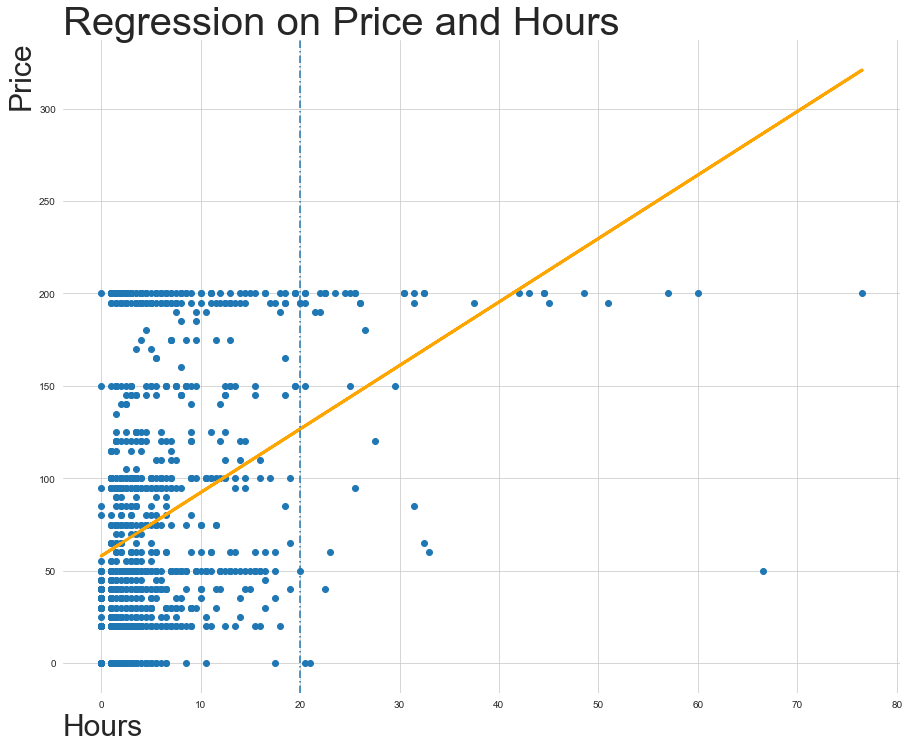

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# can try to color code only courses ranging from 0-20 hours

sns.set_style("whitegrid")
plt.figure(figsize=(15,12))
plt.scatter(x1,y)
yhat = 3.4368*x1 + 57.9377
plt.plot(x1,yhat,lw=3,c='orange',label='regression line')
plt.axvline(x=20,dashes=(5, 2, 1, 2))
plt.xlabel("Hours",fontsize=30,loc='left')
plt.ylabel("Price",fontsize=30,loc='top')
plt.title("Regression on Price and Hours",loc="left",fontsize=40,fontweight=20)
sns.despine(left=True,bottom=True)

After conducting a regression analysis between `contentInfo_hours` and `price`, we see that there is hardly such a relationship. A course that ranges between a length of under 1 hour to 20 hours of lectures can be priced anywhere from free to the max price: \\$200. There are also courses that are under 20 hours can be set at any price point. Some courses that are under 1 hour long can cost over $100! This can be explained that placing large discounts on such high prices can tempt more people to become subscribers, thinking they have snatched a great deal. Discounts can go up to -80% off or free for many days at a time. 

However, when a course has more than 20 hours of lecture, there is some positive trend of a course bring priced more expensive the more hours it has. There is too much variance between all of the plotted points to the regression line to be able to make confidant predictions on the price of a course given the number of hours of lecture it has. This disproves the initial assumption of being about to determine the price of a course by the number of hours it has.

# 20% of courses account for 80% of subscribers?
After doing a quick boxplot visualization on the numSubscribers column because it's a good business metric to measure performance for each course, we can see many outliers and I want to see what's going on.

{'whiskers': [<matplotlib.lines.Line2D at 0x128db1fb430>,
 'caps': [<matplotlib.lines.Line2D at 0x128db1fbaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x128db1fb0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x128db2071f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x128db207550>],
 'means': []}

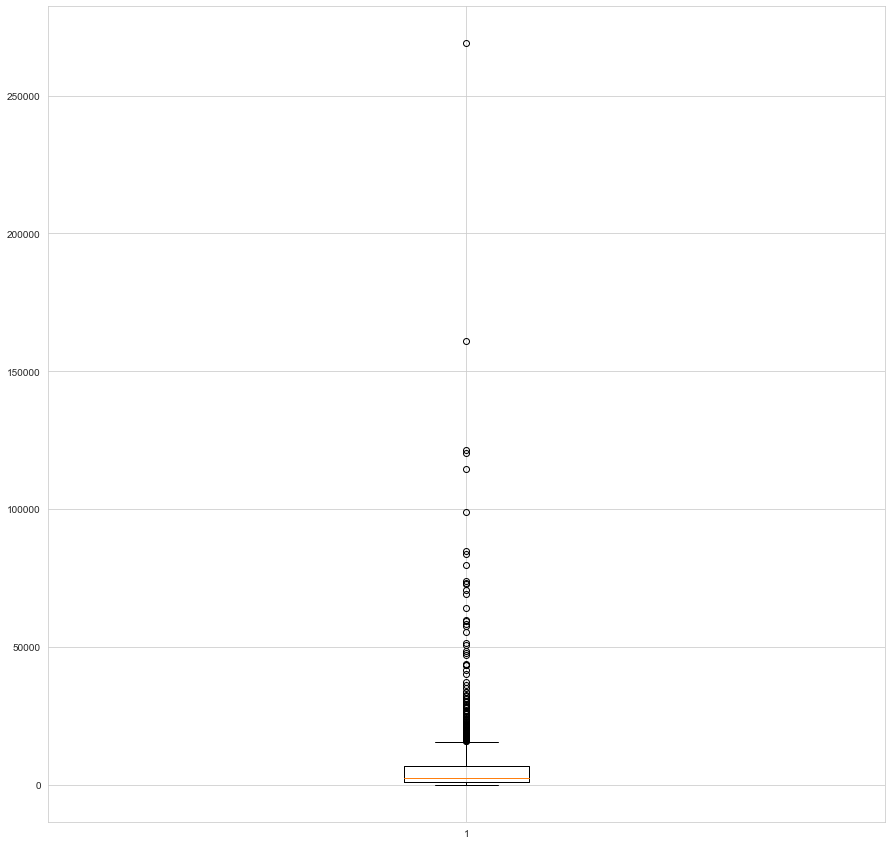

In [48]:
# numSubscribers is a good business metric to observe performance of courses
# we see many outliers and lets find out what's going on
plt.figure(figsize=(15,15))
plt.boxplot(web_dev.numSubscribers)

After changing perspectives by using a histogram instead of a boxplot, we can see extreme right skewedness; it levels out past the point where courses have more than 25,000 subscribers. This shows that the ratio between the number of courses having under 25,000 subscribers to the number of courses having over 25,000 subscribers is immensely disproportionate.

<AxesSubplot:xlabel='numSubscribers', ylabel='Count'>

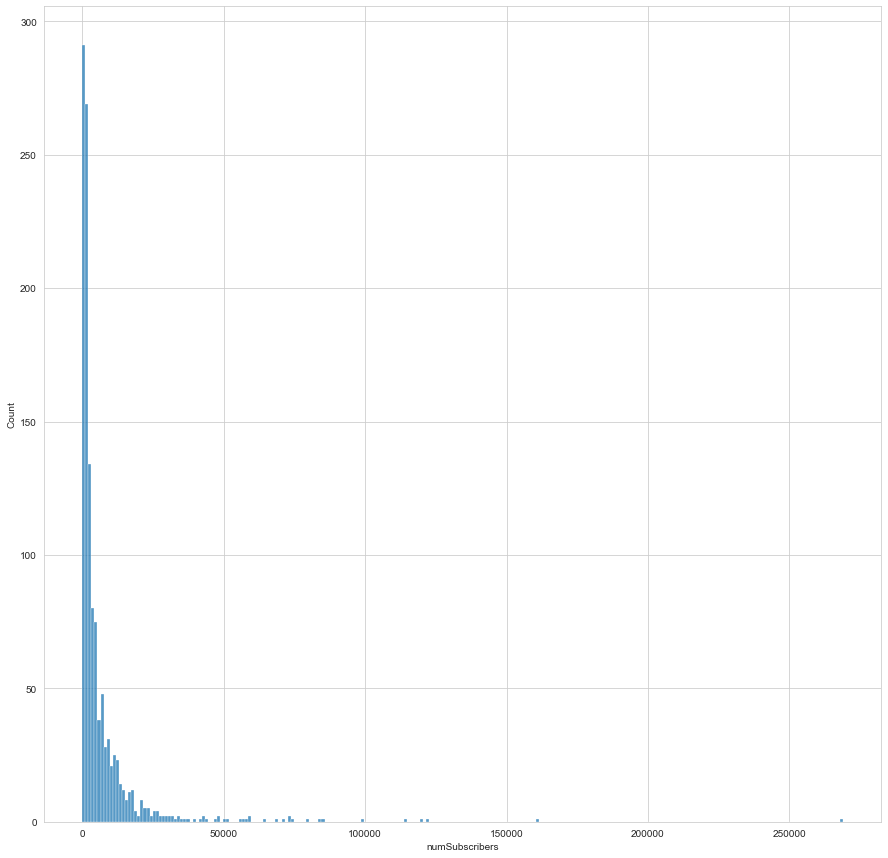

In [88]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,15))
df_sorted= web_dev.sort_values('numSubscribers',ascending=False)
sns.histplot(df_sorted.numSubscribers)

From the graph, we can estimate that the cutoff point for where the majority of courses lie is at 25,000 subscribers

Findings from the calculations below:
- 96% of all courses had less than 25,000 subscribers and accounted for 62% of all subscribers
- 4% of all courses had more than 25,000 subscribers and accounted for 38% of all subscribers
- only a small percentage of courses are doing most of the heavy lifting for Udemy while the majority of classes are scraping by

Can help to find this:
- what percentage of classes having less than 25,000 subscribers are free?
- what percentage of classes having more than 25,000 subscribers are free?
    - this could explain why so many people would want to choose these classes

In [17]:
# new dataframe for courses having under 25,000 subscribers
under25k = web_dev[web_dev.numSubscribers < 25000]

# percentage of number of courses that have under 25,000 subscribers
per_under25k = round((under25k.shape[0] / web_dev.shape[0])*100, 1)
per_under25k

95.6

In [18]:
# percent of total courses that have over 25,000 subscribers
per_over25k = round(100 - per_under25k, 1)
per_over25k

4.4

In [19]:
under25k.count()

id                      1147
title                   1147
url                     1147
isPaid                  1147
price                   1147
numSubscribers          1147
numReviews              1147
numPublishedLectures    1147
instructionalLevel      1147
contentInfo_hours       1147
publishedTime           1147
dtype: int64

In [20]:
web_dev.count()

id                      1200
title                   1200
url                     1200
isPaid                  1200
price                   1200
numSubscribers          1200
numReviews              1200
numPublishedLectures    1200
instructionalLevel      1200
contentInfo_hours       1200
publishedTime           1200
dtype: int64

In [21]:
# total sum number of all subscribers
web_dev.numSubscribers.sum()

7980572

In [22]:
# sum of numSubscribers for courses having under 25,000 subscribers
under25k.numSubscribers.sum()

4984164

In [23]:
# sum of numSubscribers for courses having over 25,000 subscribers
sum_over25k = web_dev.numSubscribers.sum() - under25k.numSubscribers.sum()
sum_over25k

2996408

In [24]:
# percentage of total students the top performing 4% of classes holds
top_percentile = ((sum_over25k / web_dev.numSubscribers.sum())*100).round(1)
top_percentile

37.5

In [25]:
# percentage of total students the bottom performing 96% of classes holds
bottom_percentile = ((under25k.numSubscribers.sum() / web_dev.numSubscribers.sum())*100).round(1)
bottom_percentile

62.5

# Possible To Do A Waterfall Chart Here

In [26]:
# data = {'Percentile': ['Top Percentile (Over 25K Subscribers)','Bottom Percentile (Under 25K Subscribers)','All'],
#         'Sum Number of Courses Held': [53,1147,1200],
#         'Percentage of All Courses Held': [4,96,100],
#         'Sum Number of Subscribers': [2996408,4984164,7980572],
#         'Percentage of Subscribers': [38,62,100]}
# stats = pd.DataFrame(data, columns=['Percentile','Sum Number of Courses Held','Percentage of All Courses Held','Sum Number of Subscribers','Percentage of Subscribers'])
# stats

In [27]:
# remove spacing and capitalizing in column names

data = {'Percentile': ['Courses with Under 25K Subs','Courses with Over 25K Subs'],
        'Sum Number of Courses Held': [1147,53],
        'Percentage of All Courses Held': [96,4],
        'Sum Number of Subscribers': [4984164,2996408],
        'Percentage of Subscribers': [62,38]}
stats = pd.DataFrame(data, columns=['Percentile','Sum Number of Courses Held','Percentage of All Courses Held','Sum Number of Subscribers','Percentage of Subscribers'])
stats

,Percentile,Sum Number of Courses Held,Percentage of All Courses Held,Sum Number of Subscribers,Percentage of Subscribers
0,Courses with Under 25K Subs,1147,96,4984164,62
1,Courses with Over 25K Subs,53,4,2996408,38


Text(0.0, 1.0, 'Count of Courses')

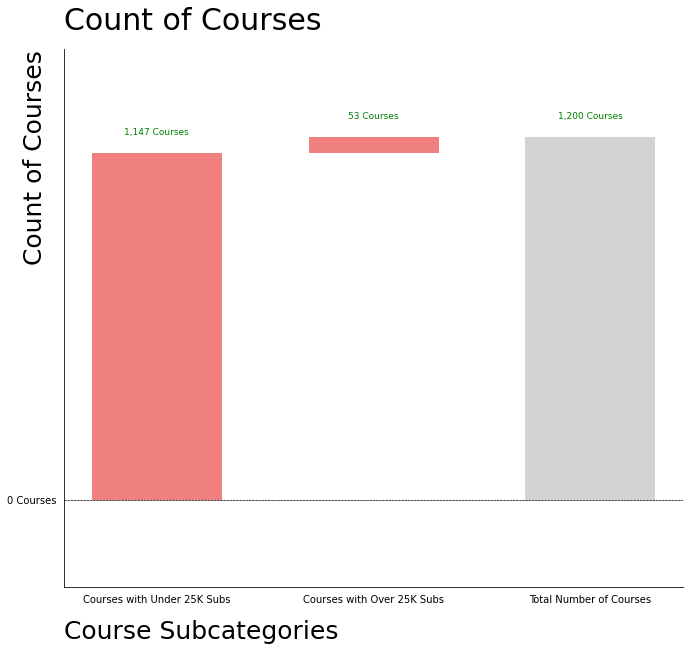

In [28]:
import waterfall_chart

plt.rcParams["figure.figsize"] = (10,8)
waterfall_chart.plot(stats.Percentile, 
                     stats["Sum Number of Courses Held"],
                     rotation_value = 0, 
                     net_label = "Total Number of Courses", 
                     formatting = "{:,.0f} Courses",
                     blue_color = 'lightgrey', 
                     green_color = 'lightcoral').grid(axis='y')

sns.despine()
plt.tick_params(left=False,bottom=False)
plt.yticks([0])
plt.xlabel("Course Subcategories",loc="left",fontsize=25,labelpad=15)
plt.ylabel("Count of Courses",loc="top",fontsize=25,labelpad=-40)
plt.title("Count of Courses",loc='left',fontsize=30,pad=20)

Text(0.0, 1.0, 'Count of Subscribers')

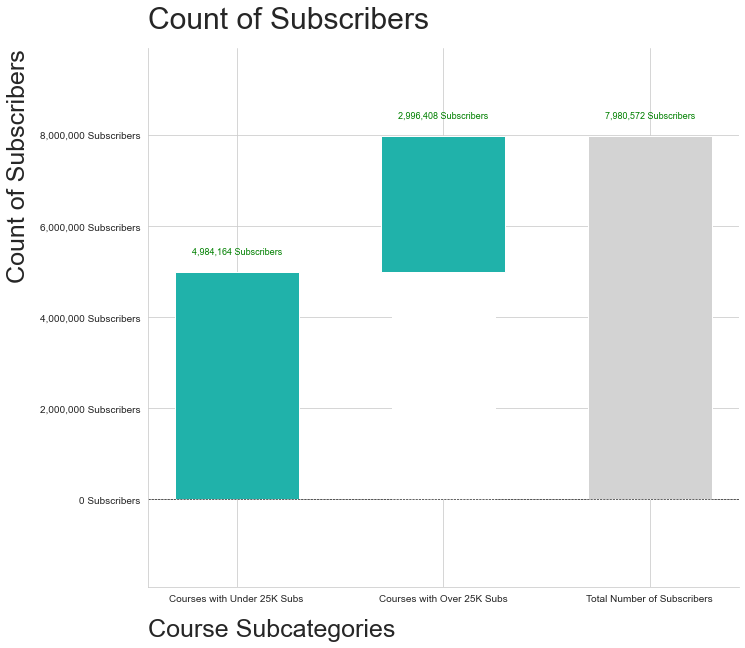

In [76]:
sns.set_style("whitegrid")
waterfall_chart.plot(stats.Percentile,stats["Sum Number of Subscribers"],
        rotation_value=0,net_label="Total Number of Subscribers",formatting="{:,.0f} Subscribers",
        blue_color='lightgrey',green_color='lightseagreen')

sns.despine()
plt.grid(True,which="minor")
plt.tick_params(left=False,bottom=False)
# plt.yticks([0])
plt.xlabel("Course Subcategories",loc="left",fontsize=25,labelpad=15)
plt.ylabel("Count of Subscribers",loc="top",fontsize=25,labelpad=10)
plt.title("Count of Subscribers",loc='left',fontsize=30,pad=20)

Text(0.0, 1.0, 'Discrepancy Between Courses Having Over or Under 25,000 Subscribers')

<Figure size 1296x1296 with 0 Axes>

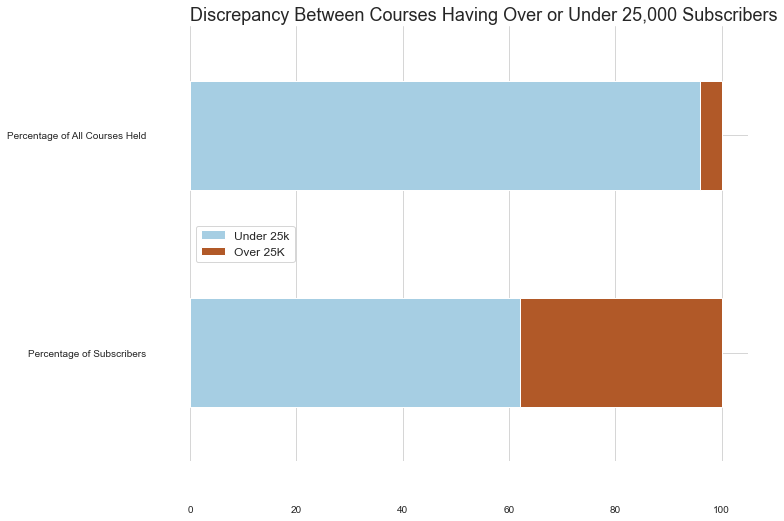

In [61]:
# figure out how to mark the segments
# add % sign to x-tick labels
from matplotlib import cm
cmap = cm.get_cmap('Paired')

plt.figure(figsize=(18,18))
sns.set_style('whitegrid')
# plt.rcParams['axes.axisbelow'] = True
stats[['Percentage of Subscribers','Percentage of All Courses Held']].T.plot(kind='barh', stacked=True,cmap=cmap)
plt.legend(['Under 25k','Over 25K'],loc='center left',fontsize=12)
sns.despine(left=True, top=True,bottom=True)
plt.tick_params(left=False,length=40)
plt.title("Discrepancy Between Courses Having Over or Under 25,000 Subscribers",loc='left',fontsize=18,fontweight=50)

# Summary of What the Viz is Supposed to Say

Make a storyboard with the data I got.

1. Is there some kind of conflict or stakes that can be brought up with the data? What's in it for the reader to get invested in this project?

# Visualizing Descriptive Insights
From this histogram, it looks like a whopping 96% of courses on Udemy has under 25,000 subscribers; this is 62% of all subscribers. Meaning that the top 4 percentile of classes possess holds 38% of all subscribers

In [31]:
# plt.figure(figsize=(18,18))
# # plt.bar(x=["Courses under 25,000 Subscribers","Courses Over 25,000 Subscribers"],y=[top_percentile,bottom_percentile],height=1)
# per = pd.Series[top_percentile,bottom_percentile]
# lab = pd.Series["Over","Under"]
# sns.factorplot(x=lab,y=per)

# What Statistical Analysis Can I Do with Log?
Decide whether this part will even be necessary.

<AxesSubplot:xlabel='numSubscribers', ylabel='Count'>

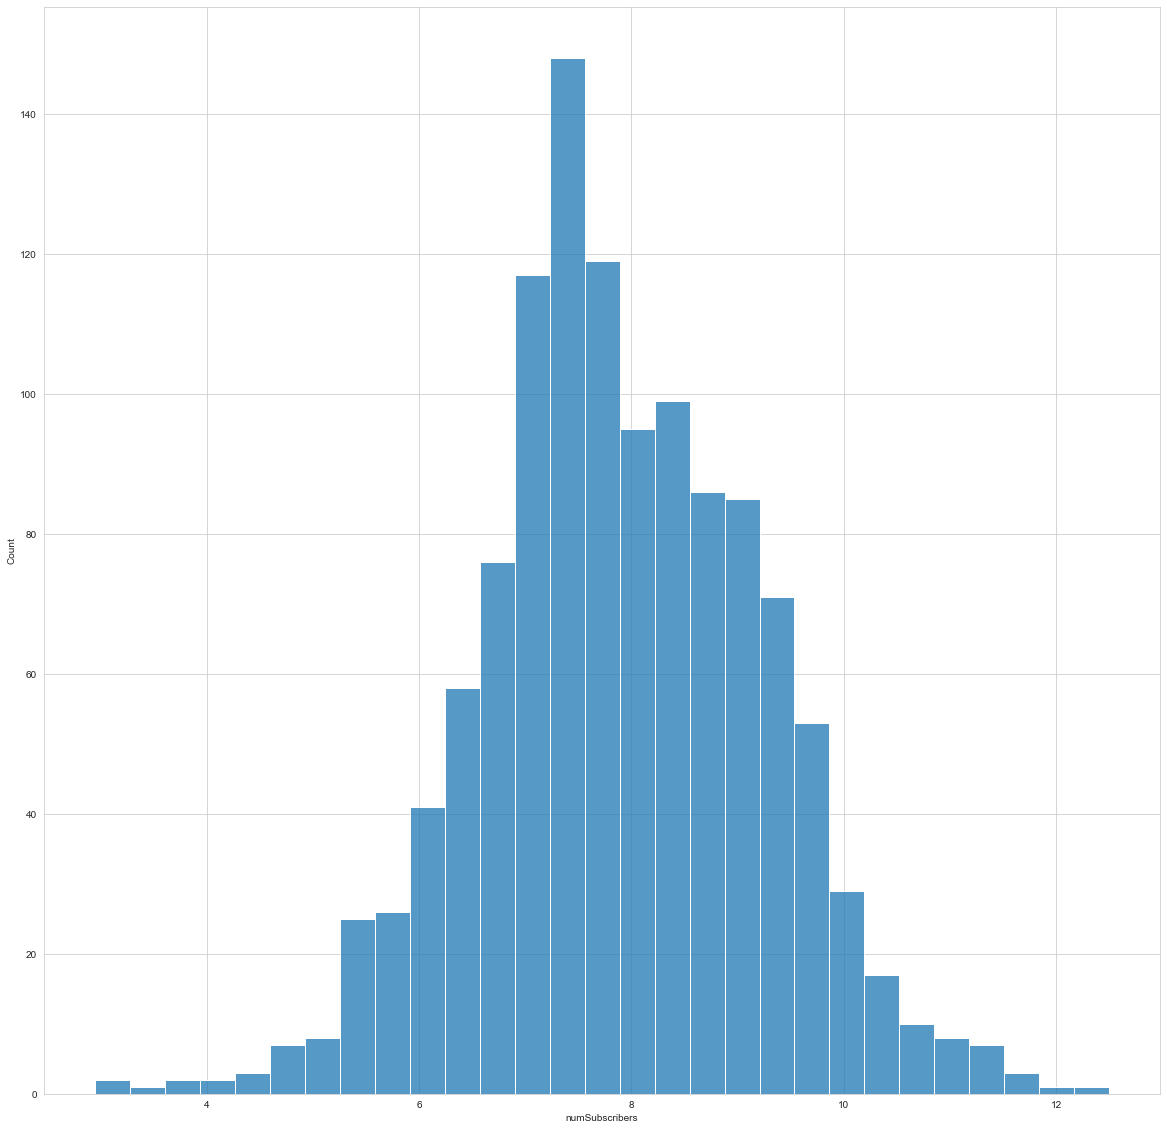

In [32]:
import numpy as np
numlog = np.log(web_dev.numSubscribers)

plt.figure(figsize=(20,20))
sns.histplot(numlog)